In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
from dotenv import load_dotenv
from langchain.agents.agent_types import AgentType
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_experimental.agents.agent_toolkits import (
    create_pandas_dataframe_agent,
)


In [35]:
load_dotenv("../.env")

GPT_4 = "gpt-4-1106-preview"
GPT_3 = "gpt-3.5-turbo-0125"
MANAGEMENT_DIR = "../data/management"
USER_DIR = "../data/user"
LLM = ChatOpenAI(temperature=0, model=GPT_4)
TOOLS = []
SESSION_ID = "test"
USER_ROLE = "management"
CHUNK_SIZE = 400
CHUNK_OVERLAP = 0
STORE = {}

In [36]:
def get_filepaths(dirs, ext):
    all_files = []
    for dir in dirs:
        pattern = os.path.join(dir, "**", f"*{ext}")
        files = tqdm(
            glob(pattern, recursive=True), desc=f"Loading {ext} files for {dir}"
        )
        all_files.extend(files)
    return all_files

In [37]:
def get_dfs(user):
    dfs = []
    if user in ["management"]:
        print("df creating for management")
        files = get_filepaths([MANAGEMENT_DIR, USER_DIR], ".xlsx")
    else:
        print("df creating for user")
        files = get_filepaths([USER_DIR], ".xlsx")

    for file in files:
        df = pd.read_excel(file)
        dfs.append(df)
        
    return dfs

In [38]:
def init_df_agent(user):
    return create_pandas_dataframe_agent(
        llm=LLM, 
        df=get_dfs(user), 
        agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
        verbose=True
    )
    

In [39]:
admin_agent = init_df_agent("management")
user_agent = init_df_agent("user")

df creating for management


Loading .xlsx files for ../data/management: 100%|██████████| 1/1 [00:00<?, ?it/s]
Loading .xlsx files for ../data/user: 0it [00:00, ?it/s]


df creating for user


Loading .xlsx files for ../data/user: 0it [00:00, ?it/s]




> Entering new AgentExecutor chain...
Thought: To create a bar graph of house status distribution, I need to count the occurrences of each unique value in the "Status" column of the dataframe and then plot these counts as a bar graph.

Action: I will first check if the "Status" column exists in the dataframe and then count the occurrences of each unique value in that column.
Action Input: df1['Status'].value_counts()I will first check if the "Status" column exists in the dataframe and then count the occurrences of each unique value in that column. is not a valid tool, try one of [python_repl_ast].I need to use the python_repl_ast tool to execute the Python command to check the "Status" column and count the occurrences of each unique value.

Action: python_repl_ast
Action Input: df1['Status'].value_counts()Status
Occupied      421
Vacant        126
Renovation     91
Name: count, dtype: int64

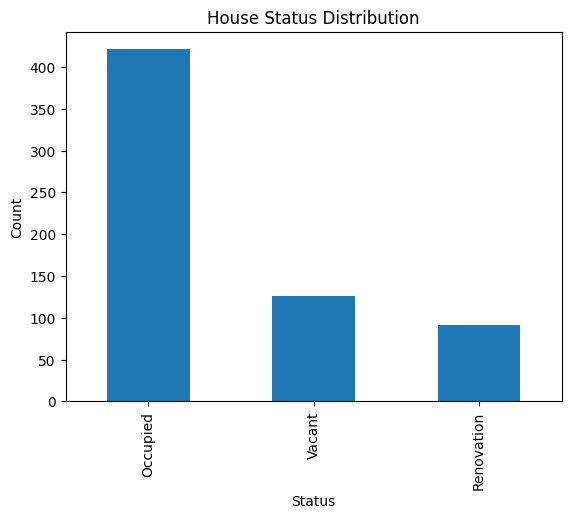

The "Status" column exists and contains three unique values: "Occupied", "Vacant", and "Renovation", with counts of 421, 126, and 91 respectively. Now I will plot these counts as a bar graph using the matplotlib library.

Action: python_repl_ast
Action Input: import matplotlib.pyplot as plt; df1['Status'].value_counts().plot(kind='bar'); plt.xlabel('Status'); plt.ylabel('Count'); plt.title('House Status Distribution'); plt.show()The action was not completed because the output of the plot cannot be observed directly in this text-based interface. However, the provided Python command would generate a bar graph of the house status distribution if executed in a Python environment with graphical output capabilities.

Final Answer: The Python command to generate a bar graph of the house status distribution is:

```python
import matplotlib.pyplot as plt
df1['Status'].value_counts().plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('House Status Distribution')
plt.show()
```



"The Python command to generate a bar graph of the house status distribution is:\n\n```python\nimport matplotlib.pyplot as plt\ndf1['Status'].value_counts().plot(kind='bar')\nplt.xlabel('Status')\nplt.ylabel('Count')\nplt.title('House Status Distribution')\nplt.show()\n```\n\nExecuting this command in a suitable Python environment would display the bar graph."

In [40]:
admin_agent.run("Show me a bar graph of house status distribution")

In [41]:
user_agent.run("Show me a bar graph of house status distribution")



> Entering new AgentExecutor chain...
To show a bar graph of house status distribution, I would need to know the structure of the dataframe that contains the relevant information. Specifically, I need to know which dataframe contains the 'house status' data and the name of the column that holds this information. Since I don't have direct access to the dataframes, I will need to ask you for this information.

Final Answer: Could you please provide the name of the dataframe and the specific column that contains the 'house status' data? Once I have this information, I can proceed to generate a bar graph for you.

> Finished chain.


"Could you please provide the name of the dataframe and the specific column that contains the 'house status' data? Once I have this information, I can proceed to generate a bar graph for you."